### Introdução
Este exemplo visa demonstrar a utilização do algoritmo XGBoost para problemas de classificação. Dessa forma, vamos aplicar o classificador XGBoost para resolver um problema de classificação binária, onde queremos prever se um determinado individuo pode ter adquirido diabetes.

O conjunto de dados utilizado contém informações sobre o nível de glicose, pressão sanguínea, espessura da pele,, insulina, índice de massa corporal, histórico familiar de diabetes e idade dos indivíduos.

In [57]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, plot_confusion_matrix

# Ignorar warnings
warnings.filterwarnings("ignore")

git_url = "https://github.com/plotly/datasets/blob/master/diabetes.csv?raw=true"
df_diabetes = pd.read_csv(git_url)

NUM_POPULACAO = df_diabetes.shape[0]
NUM_ATRIBUTOS = df_diabetes.shape[1] 

### Análise dos dados
O conjunto de dados possui um total de 768 registros com 9 atributos, onde os 8 primeiros serão utilizados como atributos de entrada e o último será utilizado como atributo de saída.
A população sem diabetes é de 500 indivíduos, ou seja, 65,10% da população total e a população com diabetes é de 268 ou 34,90%.

Como podemos ver, distribuição das classes é desequilibrada, o que significa que o resultado das previsões possui mais chances de estar concentrado na classe 0 (sem diabetes).

In [58]:
df_diabetes.head(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


População: 768
População sem diabetes: 500
População com diabetes: 268
0 - pacientes sem diabetes | 1 - pacientes com diabtes



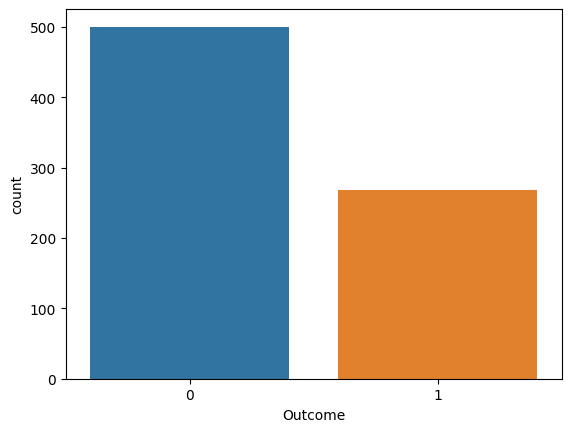

In [59]:
print('População:', NUM_POPULACAO)

# contagem da classe alvo
contagem = df_diabetes['Outcome'].value_counts()
print(f"População sem diabetes: {contagem[0]}")
print(f"População com diabetes: {contagem[1]}")

# plotar gráfico de barras para as Classes
sns.countplot('Outcome', data=df_diabetes)
print('0 - pacientes sem diabetes | 1 - pacientes com diabtes\n')

### Verificando a presença de outliers
É possível perceber que o dataset possui alguns outliers

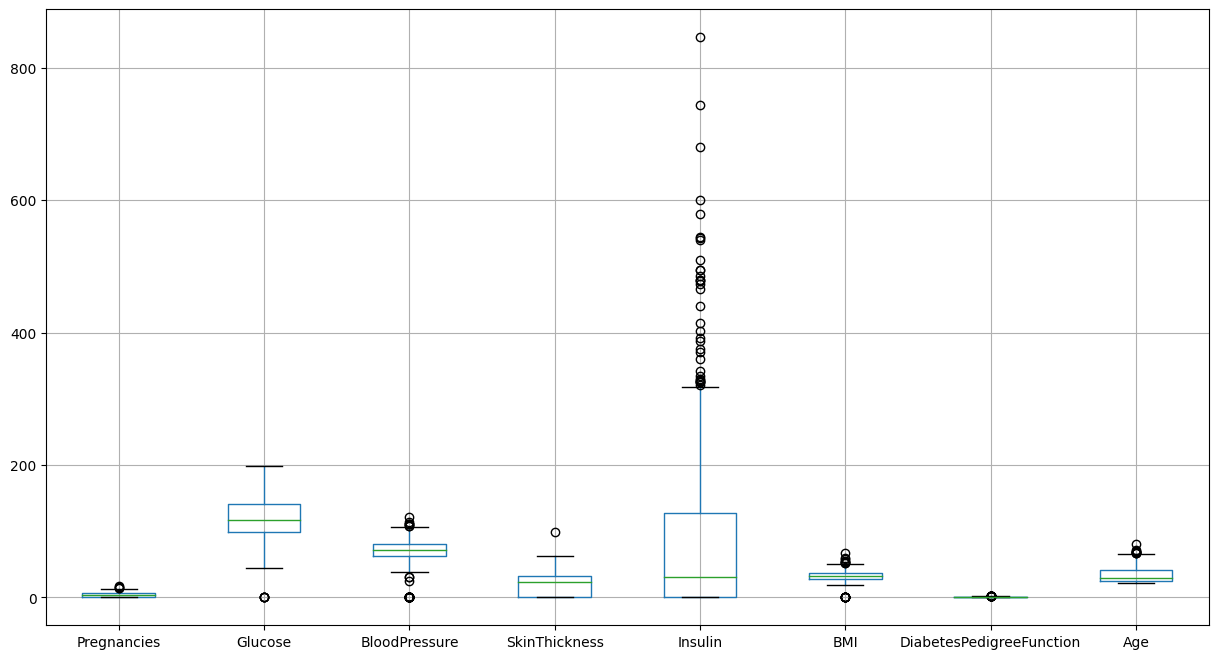

In [60]:
# plotar um boxplot para analisar presença de outliers no dataset
colunas = df_diabetes.columns.to_list()
plt.figure(figsize=(15,8))
df_diabetes.boxplot(column = colunas[:-1])
plt.show()

### Definindo os recursos de entrada e saída
Após entender e identificar os atributos, é necessário carregar os dados no modelo, onde x é o vetor de atributos de entrada e y é o atriubo de saída.

Depois, devemos separar os dados em um conjunto de treinamento e um conjunto de teste, para isso nós utilizamos o método train_test_split da biblioteca SK-Learn.

In [61]:
# definindo os recuros de entrada(x) e saida(y) 
x = df_diabetes.iloc [: , :-1].values
y = df_diabetes.iloc[ : , -1].values

# separando os dados de treino e teste
X_train, X_test, y_train, y_test = train_test_split(x, y, 
                                                    test_size = 0.30, 
                                                    shuffle=True, 
                                                    random_state = 0)

# verificando a dimensão dos dados de treino e teste
print(f'Dados para Treino: {X_train.shape[0]} amostras')
print(f'Dados para Teste: {X_test.shape[0]} amostras')

Dados para Treino: 537 amostras
Dados para Teste: 231 amostras


### Realizando o treinamento
Parâmetros utilizados:
- n_estimators: número de árvores ou seja, número de rounds de boosting
- max_depth: profundidade máxima das árvores
- learning_rate: taxa de aprendizado (eta)
- subsample: proporção da subamostra da instância de treinamento, ou seja, a fração de observações da amostra para cada árvore
- random_state: seed aleatória

In [62]:
clf = XGBClassifier(n_estimators = 650,
                    max_depth = 10, 
                    learning_rate = 0.01,
                    subsample = 1,
                    random_state=0)

# Treinando o classificador XGB
clf.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.01, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=10, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=650,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)

### Prevendo e analisando o classificador
Realizamos a predição com os dados de teste e então comparamos com o resultado esperado
#### Matriz de confusão
Revela a quantidade de verdadeiro positivo, verdadeiro negativo, falso positivo e falso negativo. Permite realizar cálculos de desempenho
#### Acurácia
A precisão do modelo é de 80%.
#### Relatório de classificação
Exibe diversas métricas desempenho para o modelo

In [63]:
# fazendo a predição com os dados de teste
y_pred = clf.predict(X_test)
# combinando os valores encontrados com os valores atuais
pd.DataFrame(data={'Rótulo Atual': y_test, 'Rótulo Predito': y_pred}).head()

,Rótulo Atual,Rótulo Predito
0,1,1
1,0,0
2,0,0
3,1,1
4,0,0


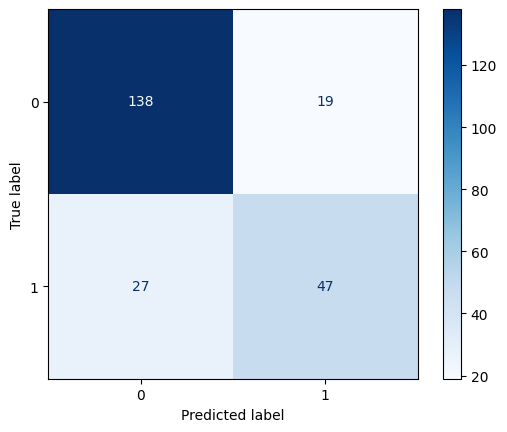

In [64]:
# apresentando os resultados pela matriz de confusão
plot_confusion_matrix(clf, X_test, y_test, cmap='Blues')

In [66]:
# Score da Acurácia
print(f'Precisão do modelo: {round(accuracy_score(y_test, y_pred)*100,3)}%')

# Relatório da Classificação
print(classification_report(y_test, y_pred))

Precisão do modelo: 80.087%
              precision    recall  f1-score   support

           0       0.84      0.88      0.86       157
           1       0.71      0.64      0.67        74

    accuracy                           0.80       231
   macro avg       0.77      0.76      0.76       231
weighted avg       0.80      0.80      0.80       231



### Conclusão
Podemos concluir que o XGBoost lidou bem com o conjunto de dados desequilibrado, porém acurácia deixou um pouco a desejar.
As próximas interações podem se preocupar em balancear o dataset e remover a presença de outliers para melhorar a acurácia do modelo.